---
layout: default
title: "Deep Learning - Optimization - Tuning"
categories: deeplearning
permalink: /ML31/
order: 31
comments: true
---

In [1]:
%pylab --no-import-all inline
from plot_ann import ann
from scipy.stats import multivariate_normal
import matplotlib.gridspec as gridspec
from mpl_flow import Flow
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Hyperparameter tuning

## Tuning process
How to organize your hyperparameters tuning process. In deep-learning you come across many hyper-parameters: We have seen:

* the learning rate $\alpha$ (if you are using a constant learning rate)
* the momentum parameter $\beta$
* the parameters $\beta_1, \beta_2, \epsilon$ if using ADAM optimization
* the number of hidden layers
* the number of hidden units in each layer
* the number of epochs
* the learning rate decay system and its parameter and possibly its parameter $k$
* the mini-batch size $t$

In many cases, if sorted by their importance the list would be: 

1. The single most important hyperparameter in almost all situations is the learning rate $\alpha$. 
2. Second in importance come
    * the momentum parameter $\beta$, for which $0.9$ is found to be be a good default parameter. 
    * the the mini-batch size
    * the number of hidden units in layers
3. Third in importance come 
    * the number of layers (that can sometime make a huge difference)
    * the learning rate decay
4. When using an ADAM optimization algorithm usually its parameters are never tuned and the default are kept ($0.9, 0.999, 10^{-8}$)

However it is very difficult to give a general rule for the importance of hyperparameters and each model tend to behave differently.

### Approaches to hyperparameter tuning
When approaching hyperparameter tuning there two choices, which are based on the amount of computational power available and the complexity (in terms of size of the network and training data) of the model: 

* If computational resources are scarce relatively to the complexity of the model, then one tends to babysit one model. A single model is trained and its hyperparameters are tuned day by day based on the progress of the training (<a href="#fig:tuneapproach"> figure below</a>, panel A).

* If computational resources are abundant, it is always better to train many models in parallel, each with a different set of hyperparameters (<a href="#fig:tuneapproach"> figure below</a>, panel B).

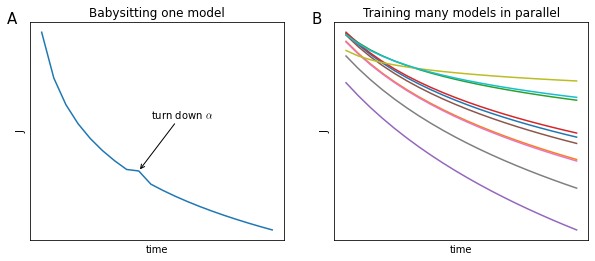

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax1, ax2 = axes
x = np.linspace(0.1, 2, 20)
y=-np.log(x)
y[8] = .2
ax1.plot(x, y)
ax1.annotate('turn down $\\alpha$', (x[8], .2), (1, 1), arrowprops=dict(arrowstyle='->'))
ax1.set_title('Babysitting one model')

for noise in np.random.rand(10):
    ax2.plot(x, -np.log(x+noise)*noise)

ax2.set_title('Training many models in parallel')

for ax, l in zip(axes, 'AB'):
    ax.text(-0.05, 1.05, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.set_ylabel('J')
    ax.set_xlabel('time')

<i id="fig:tuneapproach">Approaches to hyperparameter tuning</i>

### Hyperparameter exploration
In early days of machine learning, practitioners would sample the space of hyperparameters systematically, by testing combinations of intervals of hyperparameters (<a href="#fig:hypertune">figure below</a>, panel A). Usually, when tuning deep-learning hyperparameters, their space is sampled randomly (<a href="#fig:hypertune">figure below</a>, panel B), since it is almost impossible to know in advance which hyperparameter will have more impact on the model, but at the same time some hyperparameters tend to be much more important than others

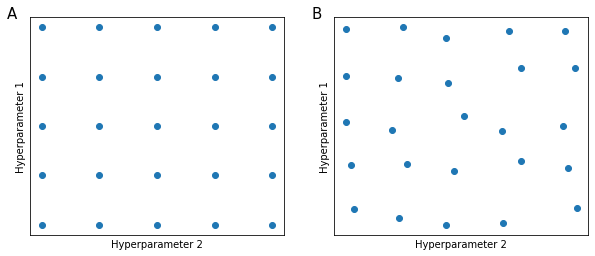

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(0, 1, 5)
x, y = np.meshgrid(x, x)
noise = (np.random.rand(5, 5)-.5)*.1
axes[0].plot(x, y, ls='none', marker='o', c='C0')
axes[1].plot(x+noise, y+noise, ls='none', marker='o', c='C0')

for ax, l in zip(axes, 'AB'):
    ax.text(-0.05, 1.05, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.set_xlabel('Hyperparameter 2')
    ax.set_ylabel('Hyperparameter 1')

<i id="fig:hypertune">Hyperparameter space sampling in early days of machine learning (A) and in modern days of deep-learning (B)</i>

This is done because when sampling the hyperparameter space as in <a href="#fig:hypertune">figure above</a> panel A, for each column of hyperparameters, you will test 5 values of Hyperparameter 1 but only 1 value of Hyperparameter 2, whereas each point <a href="#fig:hypertune">figure above</a> panel B, is a different set of Hyperparameters 1 and 2.

### Scale of hyperparameters
Choosing hyperparameters at random doesn't mean that they all need to be randomly picked from a uniform distribution, each parameter should have the appropriate scale (<a href="#fig:scales">figure below</a>). The number of hidden layers $n^{[l]}$ can be sampled from a uniform random distribution between 50 and 100, but for the number of hidden layers $L$ it is more sensible to maybe explore all the values between 2 and 4. For the learning rate $\alpha$ a uniform random sampling would waste many computational resources since we want to sample a much bigger range [0.0001, 1], and a logarithmic random sampling would be more appropriate.

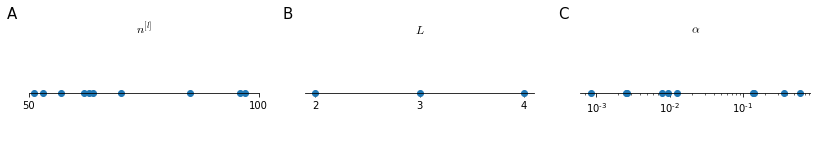

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(14, 2))
ax1, ax2, ax3 = axes

lims = [50, 100]
x = np.random.randint(*lims, size=10)
ax1.set_xticks(lims)
ax1.set_xlim(lims)
ax1.plot(x, np.zeros_like(x), ls='none', marker='o')
ax1.set_title('$n^{[l]}$')

x = np.linspace(2, 4, 3)
ax2.set_xticks(x)
ax2.plot(x, np.zeros_like(x), ls='none', marker='o')
ax2.set_title('$L$')

lims = [0.0001, 1]
x = 10**(-4*np.random.rand(10))
ax3.plot(x, np.zeros_like(x), ls='none', marker='o')
ax3.set_xscale('log')
ax3.set_title('$\\alpha$')

for ax, l in zip(axes, 'ABC'):
    ax.text(-0.05, 1.3, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('center')
    

<i id="fig:scales">Random sampling in appropriate ranges and scales for different parameters. Uniform random sampling of no. of hidden units $^{[l]}$ in the range $[50, 100]$ (A); Complete exploration of integer no. of hidden layers $L$ in the range $[2, 4]$ (B); Logarithmic random sampling of learning rate $\alpha$ in the range $\left [10^{-4}, 10^0 \right ]$ (C)</i>.

A different strategy is usually employed when sampling for the hyperparameters for exponentially weighted averages. Common values for $\beta$ range from 0.9 to 0.999 but a linear sampling in this range would be extremely inefficient, since the effect of small changes in $\beta$ is almost null when $\beta \approx 0.9$ and very big when $\beta \approx 0.999$

$$
\begin{aligned}
& \beta = 0.9000 \to \frac{1}{1-\beta}\approx 10  \qquad & \to & \qquad \beta = 0.9005 \to \frac{1}{1-\beta}\approx 10 \\
\\
& \beta = 0.9990 \to \frac{1}{1-\beta}\approx 1000  \qquad & \to &\qquad  \beta = 0.9995 \to \frac{1}{1-\beta}\approx 2000 \\
\end{aligned}
$$

For this reason, usually instead of $\beta$, we sample $\beta - 1$ in a logarithmic random distribution in the range $\left[10^{-1}, 10^{-3} \right]$ (<a href="#fig:samplebeta">figure below</a>)

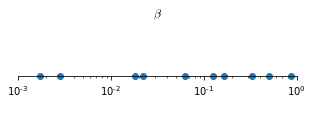

In [5]:
lims = [0.0001, 1]
x = (10**(-3*(np.random.randint(1, 100, size=10)/100)))
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(x, np.zeros_like(x), ls='none', marker='o')
ax.set_xscale('log')
ax.set_title('$\\beta$')
ax.set_yticks([])
ax.set_xlim([0.001, 1])
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('center')

<i id="fig:samplebeta">Hyperparameter sampling of $1-\beta$ (exponentially weighted average parameter)</i>

## Batch Normalization
Batch normalization is a technique that makes the search of hyperparameters much easier because it makes a neural network much more robust to different choice of hyperparameters, increasing the range of hyperparameters that work well with a model and makes the learning speed of deep neural network much faster.

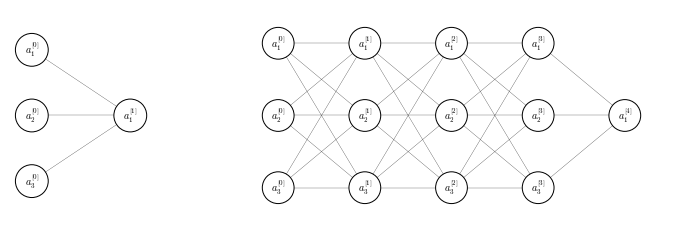

In [6]:
fig = plt.figure(figsize(12, 4))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

ann([3, 1], node_labels=True, radius=2, ax=ax1)
ann([3, 3, 3, 3, 1], node_labels=True, radius=2, width=2, ax=ax2)
for ax, l in zip([ax1, ax2], 'AB'):
    ax.set_aspect('equal')

<i id="fig:shallowdeep">A shallow (equivalent to logistic regression) and a deep neural network</i>

We have seen that when training a model, normalizing the input features can speed up training (<a href="page:ML28">Deep Learning - Speed up learning - Normalization</a>). Normalizing the input feature values works in a shallow neural network, but in a deep neural network we no longer have just input feature, but also a series of activation values for each layer (<a href="#fig:shallowdeep">figure above</a>).

### Implementing Batch Norm
In batch normalization, we normalize values at each layer $l$ in order to train $w^{[l+1]}, b^{[l+1]}$ faster. There is some debate within the machine learning community about whether values should be normalized before ($z^{[l]}$) or after ($a^{[l]}$) applying the activation function. In practice normalizing $z^{[l]}$ is much more frequent.

Given some intermediate value in a neural network for a layer $l$, ($z^{(i)[l]}$) in the range from 1 to $m$, $z^{(1)[l]}, \dots, z^{(m)[l]}$

$$
\begin{split}
& \mu = \frac{1}{m} \sum_i z^{[l](i)} \\
&\sigma^2 = \frac{1}{m} \sum_i(z^{[l](i)}-\mu)^2 \\
&z^{[l](i)}_\text{norm} = \frac{z^{[l](i)} - \mu}{\sqrt{\sigma^2+\epsilon}}
\end{split}
$$

This way each of the intermediate values $z^{(i)[l]}$ will have mean 0 and standard deviation 1. However, for some hidden layers it makes sense that the intermediate levels assume another distribution (forcing them to the normal standard distribution would make the hidden units to always behave linearly for a sigmoid activation function, see <a href="ML26#fig:lintanh">relevant figure in ML26</a>), so in order to correct that we compute 

$$
\tilde{z}^{[l](i)} = \gamma z^{[l](i)}_\text{norm} + \beta
$$

where $\gamma$ and $\beta$ are learnable parameters of the model and get updated during the optimization process. The effect of these parameters is to set the mean and variance to whatever value is more appropriate, respect to data. In fact, we have

$$
\begin{split}
& \gamma = \sqrt{\sigma^2 + \epsilon}\\
& \beta = \mu \\
\end{split}
\qquad \to \qquad  \tilde{z}^{[l](i)} = z^{[l](i)} 
$$

By adjusting these parameters, we can have standardize mean and variance across one layer $l$, where the actual values of mean and variance are controlled by the learned parameters $\gamma$ and $\beta$

### Fitting Batch Norm in a neural network
Suppose you have a $L$ layer neural network. The process of applying batch normalization throughout the neural network would be that depicted in <a href="#fig:bnproc">the figure below</a>

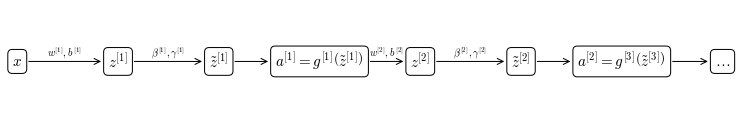

In [7]:
f = Flow(figsize=(13, 2))
f.node(1, label='$x$', fontsize=15)
f.node(2, label='$z^{[1]}$', fontsize=15, edgelabel='$w^{[1]}, b^{[1]}$')
f.node(3, label='$\\tilde{z}^{[1]}$', fontsize=15, edgelabel='$\\beta^{[1]}, \\gamma^{[1]}$')
f.node(4, label='$a^{[1]} = g^{[1]}\\left(\\tilde{z}^{[1]} \\right)$', fontsize=15)
f.node(5, label='$z^{[2]}$', fontsize=15, edgelabel='$w^{[2]}, b^{[2]}$')
f.node(6, label='$\\tilde{z}^{[2]}$', fontsize=15, edgelabel='$\\beta^{[2]}, \\gamma^{[2]}$')
f.node(7, label='$a^{[2]} = g^{[3]}\\left(\\tilde{z}^{[3]} \\right)$', fontsize=15)
f.node(8, label='$\\dots$', fontsize=15);

<i id="fig:bnproc">The process of applying Batch Normalization to subsequent layers of a neural network trained with batch gradient descent</i>

As the other learned parameters $\beta$ and $\gamma$ are updated during the optimization, for example if using gradient descent:

$$
d\beta^{[l]}  \to \beta^{[l]} = \beta^{[l]} - \alpha d\beta^{[l]}
$$

The process in <a href="#fig:bnproc">the figure above</a> refers to application of batch normalization to batch gradient descent. Usually, batch normalization is applied to mini-batches, in which case the process is:

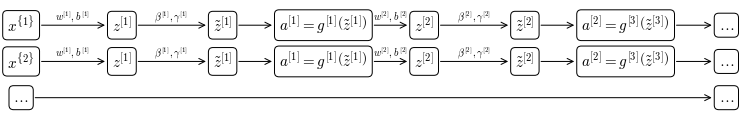

In [18]:
f = Flow(figsize=(13, 2))
f.node(label='$x^{\{1\}}$', fontsize=15)
f.node(label='$z^{[1]}$', fontsize=15, edgelabel='$w^{[1]}, b^{[1]}$')
f.node(label='$\\tilde{z}^{[1]}$', fontsize=15, edgelabel='$\\beta^{[1]}, \\gamma^{[1]}$')
f.node(label='$a^{[1]} = g^{[1]}\\left(\\tilde{z}^{[1]} \\right)$', fontsize=15)
f.node(label='$z^{[2]}$', fontsize=15, edgelabel='$w^{[2]}, b^{[2]}$')
f.node(label='$\\tilde{z}^{[2]}$', fontsize=15, edgelabel='$\\beta^{[2]}, \\gamma^{[2]}$')
f.node(label='$a^{[2]} = g^{[3]}\\left(\\tilde{z}^{[3]} \\right)$', fontsize=15)
f.node(label='$\\dots$', fontsize=15);
f.node(label='$x^{\{2\}}$', fontsize=15, travel='s', startpoint=1, connect=False, distance=.2)
f.node(label='$z^{[1]}$', fontsize=15, edgelabel='$w^{[1]}, b^{[1]}$')
f.node(label='$\\tilde{z}^{[1]}$', fontsize=15, edgelabel='$\\beta^{[1]}, \\gamma^{[1]}$')
f.node(label='$a^{[1]} = g^{[1]}\\left(\\tilde{z}^{[1]} \\right)$', fontsize=15)
f.node(label='$z^{[2]}$', fontsize=15, edgelabel='$w^{[2]}, b^{[2]}$')
f.node(label='$\\tilde{z}^{[2]}$', fontsize=15, edgelabel='$\\beta^{[2]}, \\gamma^{[2]}$')
f.node(label='$a^{[2]} = g^{[3]}\\left(\\tilde{z}^{[3]} \\right)$', fontsize=15)
f.node(label='$\\dots$', fontsize=15);
f.node(label='$\\dots$', fontsize=15, travel='s', startpoint=9, connect=False, distance=.2)
f.node(label='$\\dots$', fontsize=15, distance=7);

Now, $z^{[l]}$ is computed as 

$$z^{[l]} = w^{[l]}a^{[l-1]}+b^{[l]}$$

But since batch norm is going to first normalize $z^{[l]}$ to $\mu=0, \sigma^2=1$ and then rescale by $\beta, \gamma$. This means that whatever the value of $b$ it is going to be subtracted during the computation of the mean of the $z^{[l]}$ vector and adding any constant to all examples in a mini-batch doesn't affect the mean.

So the actual parameter of the batch norm are $w^{[l]}, \beta^{[l]}$ and $\gamma^{[l]}$

### Batch Normalization reduces covariate shift
When training a model on a training set we try to make the model generalize to be robust to changes in the distribution of data (<a href="#fig:covshift">figure below</a>). The idea of data distribution changing is called **covariate shift**. Usually if the distribution of our input data changes we may need to retrain our algorithm, even if the target function remains unchanged.

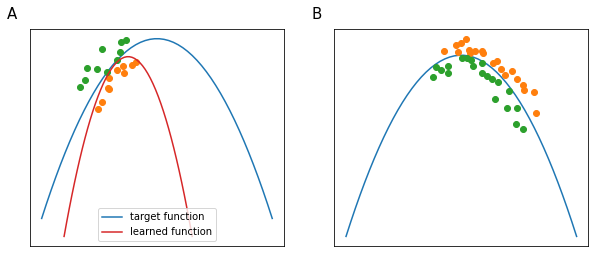

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes
x = np.linspace(-1, 1)
y = -x**2

for ax, l in zip(axes, 'AB'):
    ax.text(-0.05, 1.1, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.plot(x, y, label='target function')
    ax.set_xticks([])
    ax.set_yticks([])
    

noise = np.random.rand(10)*.1
ax1.plot(x[10:20]+noise, y[10:20]-noise[::-1], marker='o', ls='none')
ax1.plot(x[10:20]-noise, y[10:20]+noise, marker='o', ls='none')
# ax1.plot([-1, 0], [-.7, .15], label='learned function')
ax1.plot(x/1.8-.25, -x**2-.1, label='learned function')
ax1.legend()

noise = np.random.rand(20)*.1
ax2.plot(x[20:40]+noise, y[20:40]+noise[::-1], marker='o', ls='none')
ax2.plot(x[20:40]-noise, y[20:40]-noise, marker='o', ls='none');

<i id="fig:covshift">An example of covariate shift, where our training data distribution shifts. We don't expect a learned function trained on data in (A) to fit well the data in (B), even though a target function exists that generalizes both datasets</i>

In a deep neural network like that in <a href="#fig:shallowdeep">figure above</a> parameters $w^{[4]}, b^{[4]}$ map the values of $a^{[3]}$ to $a^{[l]}$ as to minimize the cost function $J$. However the values of $a^{[3]}$ are in turn changing during the next epoch (due to the effect of the update of $w^{[3]}, b^{[3]}$) and the distribution $a^{[3]}$ will change. So, from the perspective of $l=3$, the input values are changing all the time and so they are suffering from the problem covariate shift.

Batch norm will reduce the amount that the distribution shifts, because while the values will change, their mean and variance will remain the same. So in other words batch norm limits the amount of which varying the values of the early layers affect the distribution of later layers.

In some sense batch norm reduces the coupling of what each layer is modeling, rendering each layer more independent in what they are learning.

### Batch norm regularization side-effect
Since each mini-batch is scaled by the mean and variance computed on just that mini-batch, batch norm adds some noise to the values $z^{[l]}$ within that mini-batch. Similarly to dropout it adds some noise to each hidden layer's activation values.

This has a slight regularization effect (by no mean as powerful as dropout dropout), the bigger the mini-batch size, the smaller the regularization effect. can be used together with batch norm to add a real regularization step.